In [1]:
# Import necessary modules and libraries
import os # Interact w/ operating system
from PIL import Image # Python Imaging Library (image processing)
from datetime import datetime, timedelta # Date and time manipulation
import matplotlib.pyplot as plt # Create a histogram from image datetimes
import numpy as np # Analyze & manipulate arrays

In [2]:
# Get all image names from corresponding directory and sort alphabetically
dir = '/content/drive/MyDrive/Eclipse/Images/Originals'
images = sorted(os.listdir(dir))

# Print all image names
print(images)

['DSC_4117.JPG', 'DSC_4118.JPG', 'DSC_4119.JPG', 'DSC_4120.JPG', 'DSC_4121.JPG', 'DSC_4122.JPG', 'DSC_4123.JPG', 'DSC_4124.JPG', 'DSC_4125.JPG', 'DSC_4126.JPG', 'DSC_4127.JPG', 'DSC_4128.JPG', 'DSC_4129.JPG', 'DSC_4130.JPG', 'DSC_4131.JPG', 'DSC_4132.JPG', 'DSC_4133.JPG', 'DSC_4134.JPG', 'DSC_4135.JPG', 'DSC_4136.JPG', 'DSC_4137.JPG', 'DSC_4138.JPG', 'DSC_4139.JPG', 'DSC_4142.JPG', 'DSC_4143.JPG', 'DSC_4144.JPG', 'DSC_4145.JPG', 'DSC_4146.JPG', 'DSC_4147.JPG', 'DSC_4148.JPG', 'DSC_4149.JPG', 'DSC_4150.JPG', 'DSC_4151.JPG', 'DSC_4152.JPG', 'DSC_4153.JPG', 'DSC_4154.JPG', 'DSC_4155.JPG', 'DSC_4156.JPG', 'DSC_4157.JPG', 'DSC_4158.JPG', 'DSC_4159.JPG', 'DSC_4160.JPG', 'DSC_4161.JPG', 'DSC_4162.JPG', 'DSC_4163.JPG', 'DSC_4164.JPG', 'DSC_4165.JPG', 'DSC_4166.JPG', 'DSC_4167.JPG', 'DSC_4168.JPG', 'DSC_4169.JPG', 'DSC_4170.JPG', 'DSC_4171.JPG', 'DSC_4172.JPG', 'DSC_4173.JPG', 'DSC_4174.JPG', 'DSC_4175.JPG', 'DSC_4176.JPG', 'DSC_4177.JPG', 'DSC_4178.JPG', 'DSC_4179.JPG', 'DSC_4180.JPG', 'DSC_41

In [3]:
# Create a list to store all image datetimes
datetimes = []

# For every image name
for i in images:

  # Open the image
  image = Image.open(os.path.join(dir, i))

  # Get the image datetime
  dt = image._getexif()[306]

  # Correct and add the image datetime to the corresponding list
  datetimes.append(datetime.strptime(dt, '%Y:%m:%d %H:%M:%S') - timedelta(hours=1, minutes=12, seconds=22))

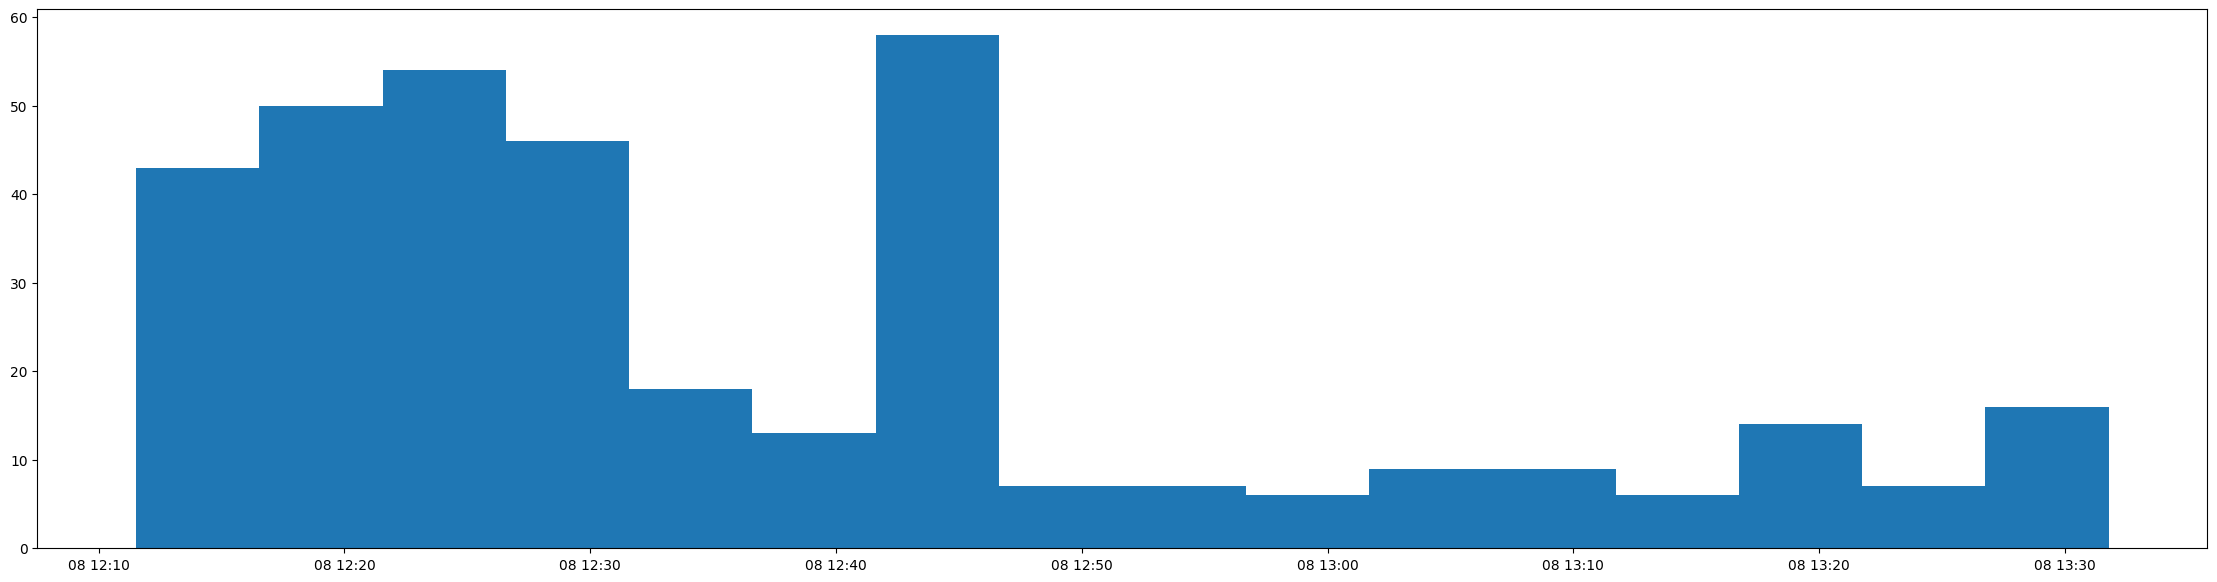

In [4]:
# Create a histogram using the list of all image datetimes
plt.figure(figsize=(28, 7))
hist = plt.hist(datetimes, bins=16)
plt.show()

In [5]:
# Create a list to store all evenly spaced images and datetimes
gif_images = []
gif_datetimes = []

# For each group
for group in hist[0]:

  # Select the maximum possible evenly spaced images within the bin
  indexes = np.linspace(0, group-1, int(min(hist[0])))

  # For each evenly spaced image
  for id in indexes:

    # Add its name to the corresponding list
    gif_images.append(images[int(id)])

    # Correct the datetime
    gif_datetimes.append(str(datetimes[int(id)]))

  # Erase all images and datetimes in the current bin
  images = images[int(group):]
  datetimes = datetimes[int(group):]

# Print all image names and datetimes
print(gif_images)

['DSC_4117.JPG', 'DSC_4125.JPG', 'DSC_4133.JPG', 'DSC_4144.JPG', 'DSC_4152.JPG', 'DSC_4161.JPG', 'DSC_4162.JPG', 'DSC_4171.JPG', 'DSC_4181.JPG', 'DSC_4191.JPG', 'DSC_4201.JPG', 'DSC_4213.JPG', 'DSC_4214.JPG', 'DSC_4224.JPG', 'DSC_4235.JPG', 'DSC_4245.JPG', 'DSC_4256.JPG', 'DSC_4267.JPG', 'DSC_4268.JPG', 'DSC_4277.JPG', 'DSC_4286.JPG', 'DSC_4295.JPG', 'DSC_4304.JPG', 'DSC_4313.JPG', 'DSC_4314.JPG', 'DSC_4317.JPG', 'DSC_4320.JPG', 'DSC_4324.JPG', 'DSC_4327.JPG', 'DSC_4346.JPG', 'DSC_4359.JPG', 'DSC_4361.JPG', 'DSC_4368.JPG', 'DSC_4371.JPG', 'DSC_4373.JPG', 'DSC_4376.JPG', 'DSC_4397.JPG', 'DSC_4409.JPG', 'DSC_4420.JPG', 'DSC_4432.JPG', 'DSC_4443.JPG', 'DSC_4455.JPG', 'DSC_4456.JPG', 'DSC_4457.JPG', 'DSC_4458.JPG', 'DSC_4459.JPG', 'DSC_4460.JPG', 'DSC_4462.JPG', 'DSC_4499.JPG', 'DSC_4500.JPG', 'DSC_4501.JPG', 'DSC_4502.JPG', 'DSC_4503.JPG', 'DSC_4505.JPG', 'DSC_4525.JPG', 'DSC_4526.JPG', 'DSC_4527.JPG', 'DSC_4528.JPG', 'DSC_4529.JPG', 'DSC_4530.JPG', 'DSC_4532.JPG', 'DSC_4533.JPG', 'DSC_45

In [6]:
# Calculate a circle's center using 3 points on its circumference
def center(point1, point2, point3):

  # Get x & y coordinates of each point
  x1, y1 = point1
  x2, y2 = point2
  x3, y3 = point3

  # Get the necessary coefficients to create a circle
  A = x1 * (y2 - y3) - y1 * (x2 - x3) + x2 * y3 - x3 * y2
  B = (x1 ** 2 + y1 ** 2) * (y3 - y2) + (x2 ** 2 + y2 ** 2) * (y1 - y3) + (x3 ** 2 + y3 ** 2) * (y2 - y1)
  C = (x1 ** 2 + y1 ** 2) * (x2 - x3) + (x2 ** 2 + y2 ** 2) * (x3 - x1) + (x3 ** 2 + y3 ** 2) * (x1 - x2)

  # Calculate the center of the circle based on the coefficients
  x = -B / (2 * A)
  y = -C / (2 * A)

  # Return the corresponding coordinates
  return x, y

In [7]:
# Create directory to save images
save_dir = '/content/drive/MyDrive/Eclipse/Images/Cropped'
os.mkdir(save_dir)

# Image counter
ic = 0

# For each image
for i in range(len(gif_images)):

  # Open the image
  image = Image.open(os.path.join(dir, gif_images[i]))

  # Turn the image grayscale
  g_image = image.convert('L')

  # Save placeholders to estimate Sun's position
  left = image.size
  right = (0,0)
  bottom = (0,0)

  # Establish a threshold based on the image's max pixel value
  max = np.max(np.array(g_image)) * 0.95

  # For every pixel in the horizontal direction
  for x in range(g_image.size[0]):

    # For every pixel in the vertical direction
    for y in range(g_image.size[1]):

      # Get the pixel's value
      value = g_image.getpixel((x, y))

      # If the pixel's value is greater or equal to the threshold...
      if value >= max:

        # ...and it's also the leftmost value, save its coordinates
        if x < left[0]:
          left = (x,y)

        # ...and it's also the rightmost value, save its coordinates
        if x > right[0]:
          right = (x,y)

        # ...and it's also the bottommost value, save its coordinates
        if y > bottom[1]:
          bottom = (x,y)

  # Estimate the Sun's center
  c = center(left, right, bottom)

  # Crop the original image and center it on the Sun
  image = image.crop((int(c[0])-540, int(c[1])-540,
                      int(c[0])+540, int(c[1])+540))

  # Save the image to the appropriate directory
  image.save(os.path.join(save_dir, gif_datetimes[i]+'.jpg'))

  # Print saved image information and upload counter
  print(f'{ic} | {gif_images[i]} | {gif_datetimes[i]} | {max}')
  ic += 1

0 | DSC_4117.JPG | 2024-04-08 12:11:31 | 224.2
1 | DSC_4125.JPG | 2024-04-08 12:12:13 | 231.79999999999998
2 | DSC_4133.JPG | 2024-04-08 12:12:30 | 230.85
3 | DSC_4144.JPG | 2024-04-08 12:13:53 | 228.95
4 | DSC_4152.JPG | 2024-04-08 12:14:45 | 230.85
5 | DSC_4161.JPG | 2024-04-08 12:16:29 | 231.79999999999998
6 | DSC_4162.JPG | 2024-04-08 12:17:37 | 232.75
7 | DSC_4171.JPG | 2024-04-08 12:17:51 | 231.79999999999998
8 | DSC_4181.JPG | 2024-04-08 12:18:34 | 233.7
9 | DSC_4191.JPG | 2024-04-08 12:19:20 | 234.64999999999998
10 | DSC_4201.JPG | 2024-04-08 12:20:22 | 234.64999999999998
11 | DSC_4213.JPG | 2024-04-08 12:21:31 | 235.6
12 | DSC_4214.JPG | 2024-04-08 12:21:35 | 233.7
13 | DSC_4224.JPG | 2024-04-08 12:22:24 | 234.64999999999998
14 | DSC_4235.JPG | 2024-04-08 12:22:46 | 235.6
15 | DSC_4245.JPG | 2024-04-08 12:24:46 | 233.7
16 | DSC_4256.JPG | 2024-04-08 12:25:44 | 234.64999999999998
17 | DSC_4267.JPG | 2024-04-08 12:26:02 | 235.6
18 | DSC_4268.JPG | 2024-04-08 12:26:54 | 235.6
19 

In [8]:
# Create a list to store all GIF images
gif_images = []

# For each cropped image
for datetime in gif_datetimes:

  # Open the image
  image = Image.open(os.path.join(save_dir, datetime+'.jpg'))

  # Append the image to the appropriate list
  gif_images.append(image)

# Create a GIF combining all stored images
gif_images[0].save('EclipseTimelapse.gif', save_all=True, append_images=gif_images[1:], duration=100, loop=0)
gif_images[0].save('/content/drive/MyDrive/Eclipse/EclipseTimelapse.gif', save_all=True, append_images=gif_images[1:], duration=100, loop=0)